<a href="https://colab.research.google.com/github/DSPL-Project-Group-B10/Cleaning/blob/main/DSPL_Cleaning_and_Editing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Train CSV**

## **Cleaning**

### Handling missing Values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# Reading the Dataset from drive to a data frame
df = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/traincsv.csv")

<ipython-input-3-089917c71b67>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/traincsv.csv")


In [ ]:
# Basic Information about the dataset
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [ ]:
# Identifying the missing values
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

print("\nTotal missing values:", missing_values.sum())

Missing values per column:
Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64

Total missing values: 111


In [ ]:
# Remove rows with missing Customer_ID
# We considered eliminating customer_ID because it is unique, and there are only two.
df.dropna(subset=['Customer_ID'], inplace=True)

# Check missing values
print(df.isnull().sum())

Customer_ID          0
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64


In [ ]:
# Fill missing outlet_city values using forward fill and then backward fill

# We analysed the dataset and discovered that similar city locations are clustered together,
# therefore we decided to use nearby values.

df['outlet_city'] = df['outlet_city'].fillna(method='ffill').fillna(method='bfill')

# Verify removal of missing values
print("Missing values per column after filling outlet_city:")
print(df.isnull().sum())


Missing values per column after filling outlet_city:


<ipython-input-7-a15173ae102c>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['outlet_city'] = df['outlet_city'].fillna(method='ffill').fillna(method='bfill')


Customer_ID          0
outlet_city          0
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64


In [ ]:
df.dropna(subset=['luxury_sales','fresh_sales','dry_sales'], inplace=True)

# Verify removal of missing values
print("Missing values per column after removing null sales columns values:")
print(df.isnull().sum())

Missing values per column after removing null sales columns values:
Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    1
dtype: int64


In [ ]:
# Remove rows with missing cluster_catgeory
# Since clusters are categorical, imputing isn't meaningful

df.dropna(subset=['cluster_catgeory'], inplace=True)

# Check missing values
print(df.isnull().sum())


Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64


### Worded values in sales columns

In [ ]:
pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=c410175152ee66929577207e378e21b2cbe9dc9fa3ced61fb08d73953b3be6ca
  Stored in directory: /root/.cache/pip/wheels/cd/ef/ae/073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [ ]:
from word2number import w2n

# Function to convert words to numbers
def convert_words_to_numbers(value):
    try:
        return w2n.word_to_num(value)
    except ValueError:
        return value  # If not a valid word number, return the original value

# Apply the conversion function to the relevant columns
df['luxury_sales'] = df['luxury_sales'].apply(lambda x: convert_words_to_numbers(x) if isinstance(x, str) else x)
df['fresh_sales'] = df['fresh_sales'].apply(lambda x: convert_words_to_numbers(x) if isinstance(x, str) else x)
df['dry_sales'] = df['dry_sales'].apply(lambda x: convert_words_to_numbers(x) if isinstance(x, str) else x)

# Ensure the columns are numeric after conversion
df[['luxury_sales', 'fresh_sales', 'dry_sales']] = df[['luxury_sales', 'fresh_sales', 'dry_sales']].apply(pd.to_numeric, errors='coerce')

# Check the updated dataframe
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 774063 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774063 non-null  float64
 1   outlet_city       774063 non-null  object 
 2   luxury_sales      774060 non-null  float64
 3   fresh_sales       774059 non-null  float64
 4   dry_sales         774056 non-null  float64
 5   cluster_catgeory  774063 non-null  object 
dtypes: float64(4), object(2)
memory usage: 41.3+ MB
None


In [ ]:
# Check for non-numeric values in luxury_sales, fresh_sales, and dry_sales columns and removing
# This is done to remove any values the algorithm missed
df = df[~df[['luxury_sales', 'fresh_sales', 'dry_sales']].apply(pd.to_numeric, errors='coerce').isnull().any(axis=1)]

# Check the updated dataframe
print(df.info())


### Fixing Cluster Category

In [ ]:
print(df["cluster_catgeory"].value_counts())

cluster_catgeory
1        188952
6        169197
2        155036
4        131027
3         48889
4         41400
5         39516
1             9
5             9
6             8
2             4
6\            1
99            1
3             1
98            1
95            1
100.0         1
89.0          1
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Convert to string and strip any unwanted characters
df["cluster_catgeory"] = df["cluster_catgeory"].astype(str).str.strip()

# Fix incorrect values and convert to integer
df["cluster_catgeory"] = df["cluster_catgeory"].replace({
    "6\\": "6",  # Fix weirdly formatted value
    "100.0": None, "89.0": None,  # Remove anomalies
    "95": None, "98": None, "99": None  # Remove more anomalies
}).astype(float)

# Drop NaN values (caused by anomalies)
df = df.dropna(subset=["cluster_catgeory"])

# Convert to integer
df["cluster_catgeory"] = df["cluster_catgeory"].astype(int)

# Keep only categories 1 to 6
df = df[df["cluster_catgeory"].isin([1, 2, 3, 4, 5, 6])]

# Check the cleaned values
print(df["cluster_catgeory"].value_counts())


cluster_catgeory
1    188961
4    172427
6    169206
2    155040
3     48890
5     39525
Name: count, dtype: int64


<ipython-input-14-37468df3796b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster_catgeory"] = df["cluster_catgeory"].astype(int)


In [ ]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


### Checking for Duplicates

In [ ]:
# Check and display duplicate rows
# If duplicate rows are present, they must be removed

duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")
if len(duplicates):
    print(duplicates)

Number of duplicate rows: 0


### Handling Outliers

In [ ]:
# Detect outliers using IQR
# We avoided using the Z score method because the data is not normally distributed

def detect_outliers(data, col):
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    return outliers

# Check outliers in numeric columns
for col in ['luxury_sales', 'fresh_sales', 'dry_sales']:
    print(f"{col} outliers: {len(detect_outliers(df, col))}")

for col in ['luxury_sales', 'fresh_sales', 'dry_sales']:
    outliers = detect_outliers(df, col)
    print(f"{col} outliers:")
    print(outliers)
    print(f"Number of outliers: {len(outliers)}\n")


luxury_sales outliers: 35049
fresh_sales outliers: 0
dry_sales outliers: 0
luxury_sales outliers:
        Customer_ID             outlet_city  luxury_sales  fresh_sales  \
327511   10310841.0                Kelaniya       4514.84      4806.12   
327515   10171582.0                Kelaniya       4248.30      3998.40   
327521   10673354.0                Kaduwela       5053.76      4607.84   
327522   10378099.0  Dehiwala-Mount Lavinia       4169.40      4725.32   
327525   10086692.0              Peliyagoda       4428.93      4160.51   
...             ...                     ...           ...          ...   
774148   10471967.0                 Gampaha       5264.00      4935.00   
774151   10494575.0              Katunayake       6095.86      5557.99   
774152   10565682.0                 Colombo       5121.42      4820.16   
774153   10351977.0                   Kandy       6311.76      6311.76   
774154   10637635.0                 Negombo       5833.50      6027.95   

        dry_s

In [ ]:
# Depending on the output, we chose not to remove any outliers because they appeared to be normal figures.

### Encoding Categorical Variables

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Preserve original city names
df['outlet_city_original'] = df['outlet_city']

# Encode 'outlet_city'
le = LabelEncoder()
df['outlet_city'] = le.fit_transform(df['outlet_city'].astype(str))

print("Encoding complete. The processed dataset now includes both original and encoded city names.")


Encoding complete. The processed dataset now includes both original and encoded city names.


In [ ]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_original
0,10493832.0,11,1209.60,756.00,5292.00,4,Kelaniya
1,10178643.0,13,1590.12,1060.08,6007.12,1,Moratuwa
2,10513916.0,19,2288.88,1481.04,9155.52,4,Wattala
3,10334589.0,19,2274.94,1739.66,9099.76,4,Wattala
4,10458365.0,11,2345.49,2069.55,9243.99,4,Kelaniya


### Creating New Features

In [ ]:
# Convert sales columns to numeric
sales_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']
df[sales_cols] = df[sales_cols].apply(pd.to_numeric, errors='coerce')


#Creating the Features
df['total_sales'] = df['luxury_sales'] + df['fresh_sales'] + df['dry_sales']
df['luxury_sales_pct'] = df['luxury_sales'] / df['total_sales'] * 100
df.fillna(0, inplace=True)  # Fill any remaining NaNs

In [ ]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_original,total_sales,luxury_sales_pct
0,10493832.0,11,1209.60,756.00,5292.00,4,Kelaniya,7257.60,16.666667
1,10178643.0,13,1590.12,1060.08,6007.12,1,Moratuwa,8657.32,18.367347
2,10513916.0,19,2288.88,1481.04,9155.52,4,Wattala,12925.44,17.708333
3,10334589.0,19,2274.94,1739.66,9099.76,4,Wattala,13114.36,17.346939
4,10458365.0,11,2345.49,2069.55,9243.99,4,Kelaniya,13659.03,17.171717


## **EDA for Train**

### *Univariate Data Analysis*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

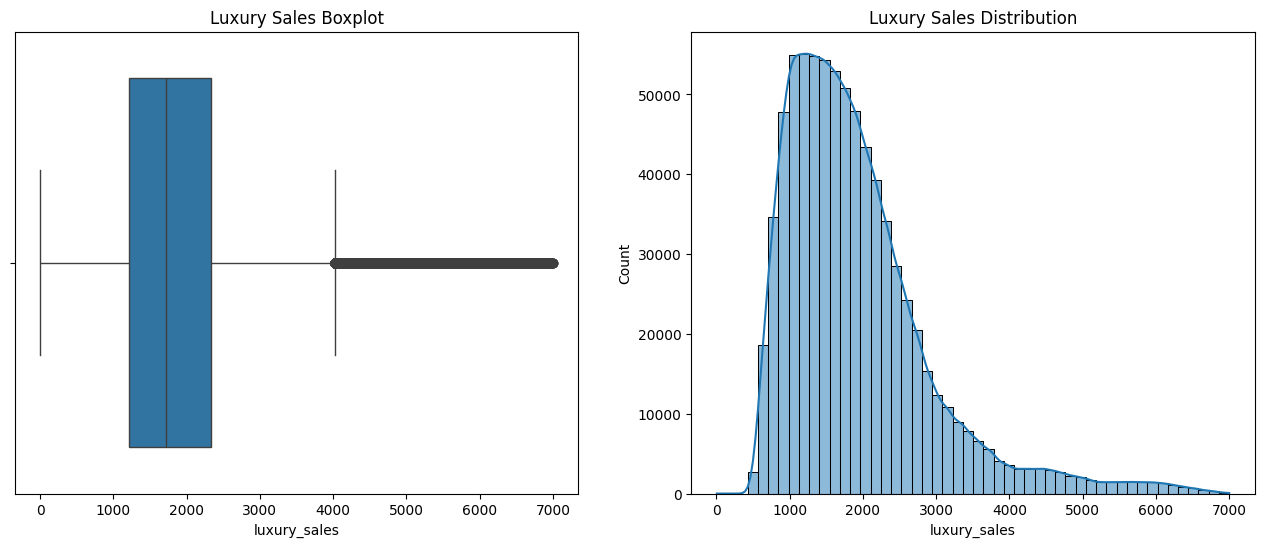

In [ ]:
# Luxury Sales Visualization
plt.figure(figsize=(16, 6))

# Boxplot for Luxury Sales
plt.subplot(1, 2, 1)
sns.boxplot(x=df['luxury_sales'])
plt.title("Luxury Sales Boxplot")

# Histogram for Luxury Sales
plt.subplot(1, 2, 2)
sns.histplot(df['luxury_sales'], bins=50, kde=True)
plt.title("Luxury Sales Distribution")

plt.show()


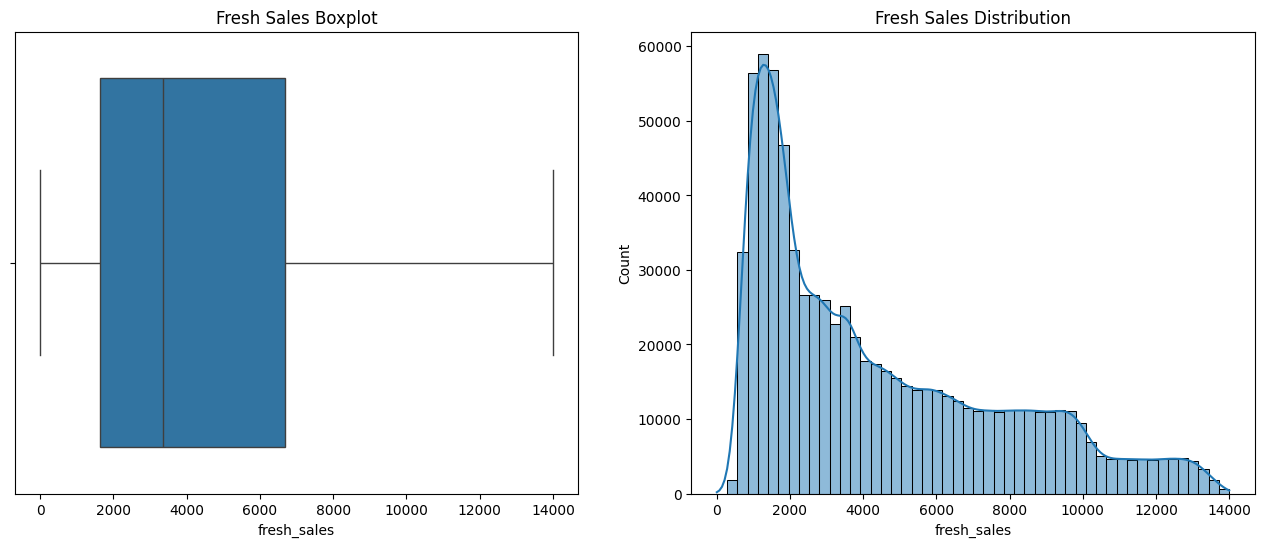

In [ ]:
# Fresh Sales Visualization
plt.figure(figsize=(16, 6))

# Boxplot for Fresh Sales
plt.subplot(1, 2, 1)
sns.boxplot(x=df['fresh_sales'])
plt.title("Fresh Sales Boxplot")

# Histogram for Fresh Sales
plt.subplot(1, 2, 2)
sns.histplot(df['fresh_sales'], bins=50, kde=True)
plt.title("Fresh Sales Distribution")

plt.show()


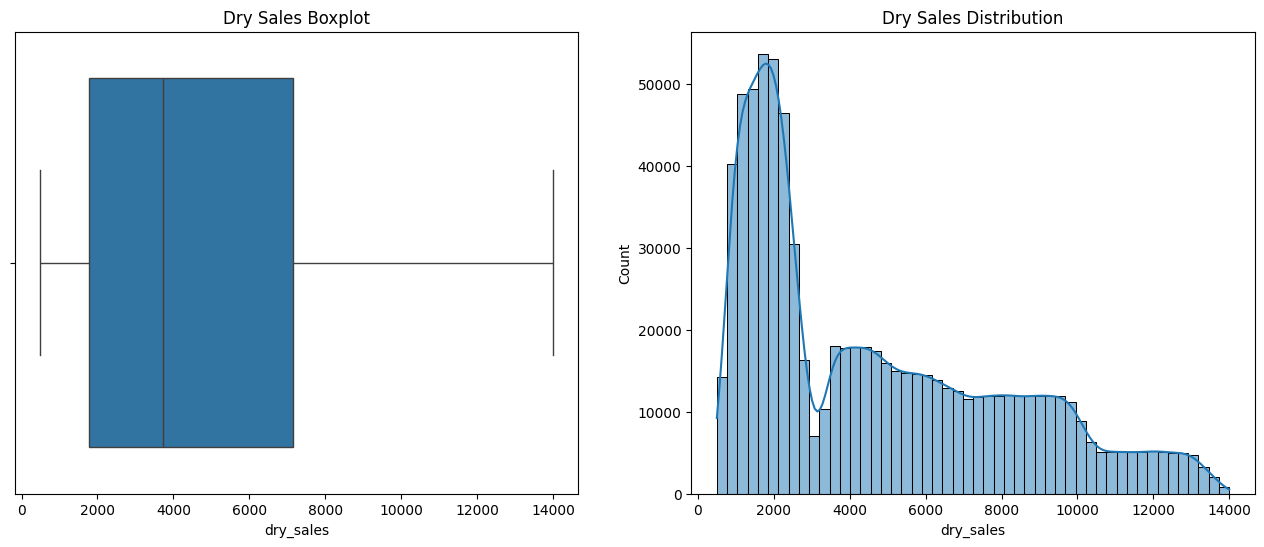

In [ ]:
# Dry Sales Visualization
plt.figure(figsize=(16, 6))

# Boxplot for Dry Sales
plt.subplot(1, 2, 1)
sns.boxplot(x=df['dry_sales'])
plt.title("Dry Sales Boxplot")

# Histogram for Dry Sales
plt.subplot(1, 2, 2)
sns.histplot(df['dry_sales'], bins=50, kde=True)
plt.title("Dry Sales Distribution")

plt.show()


### Bi Variate

In [ ]:
# Bivariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

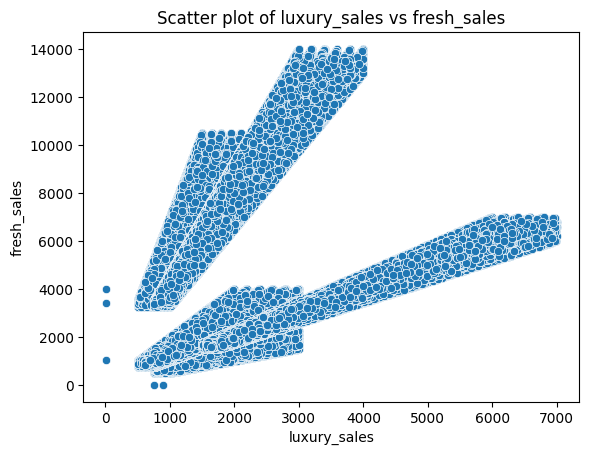

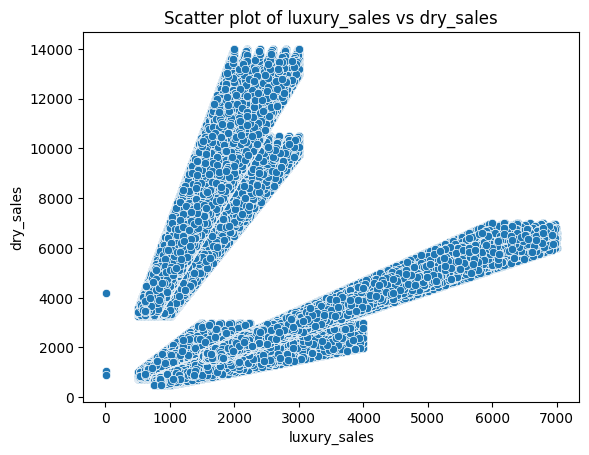

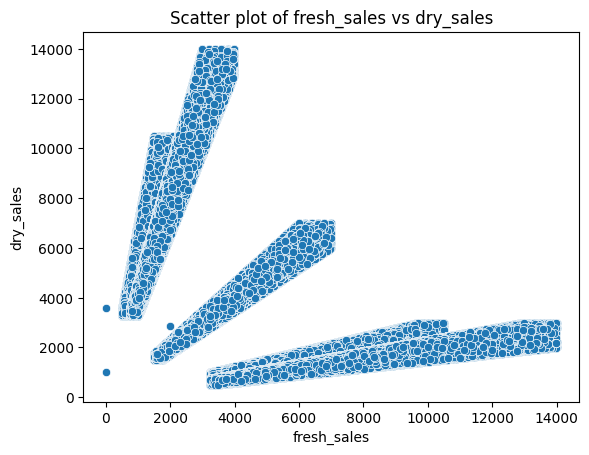

In [ ]:
# Numerical vs. Numerical Columns (Scatter plots)

num_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']

for i, col1 in enumerate(num_cols):
    for col2 in num_cols[i+1:]:
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f'Scatter plot of {col1} vs {col2}')
        plt.show()

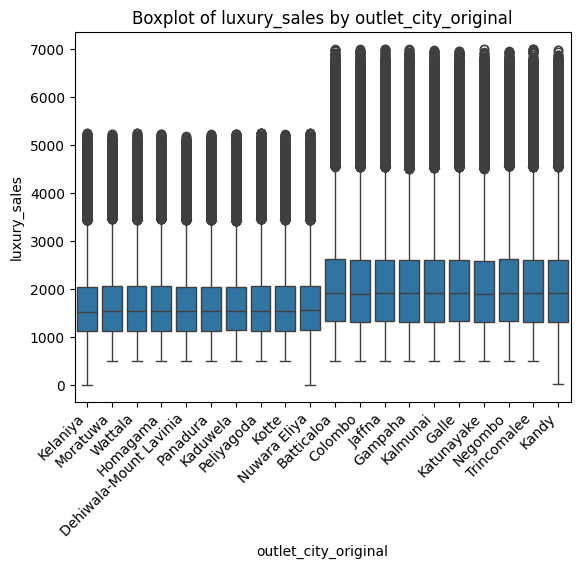

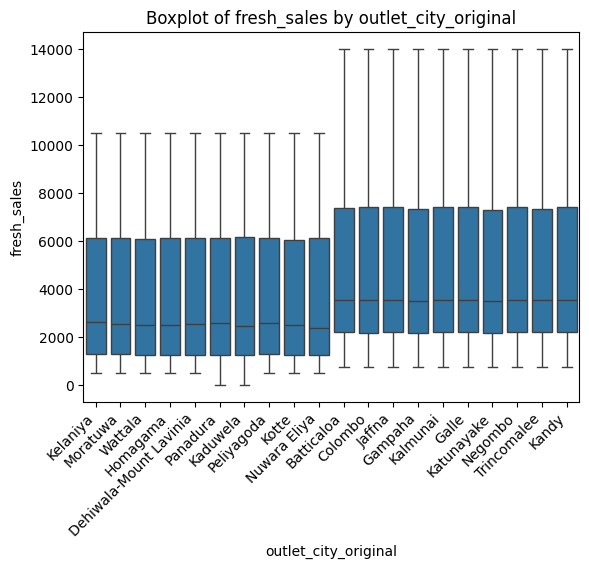

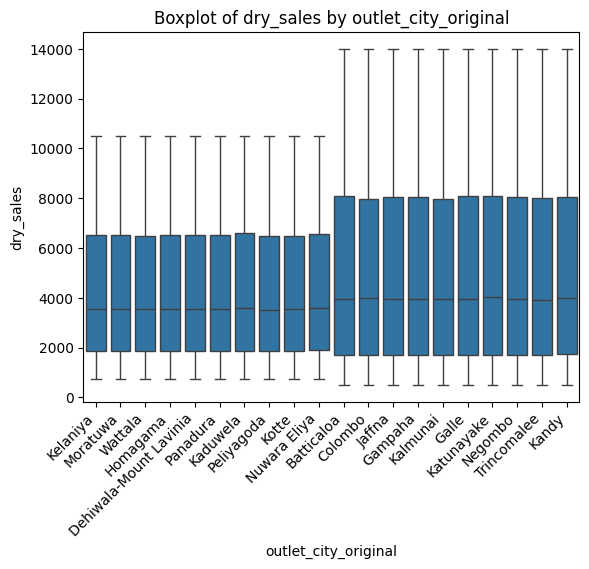

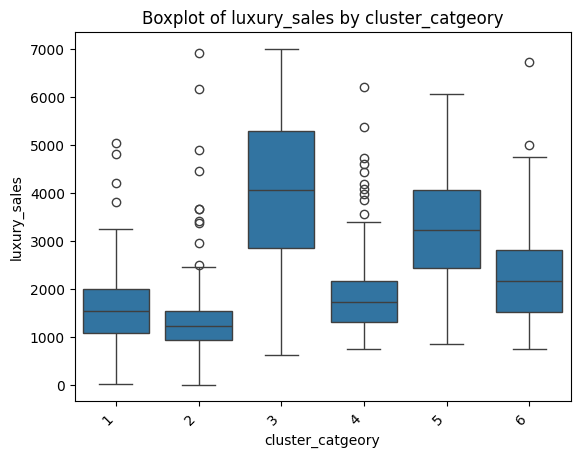

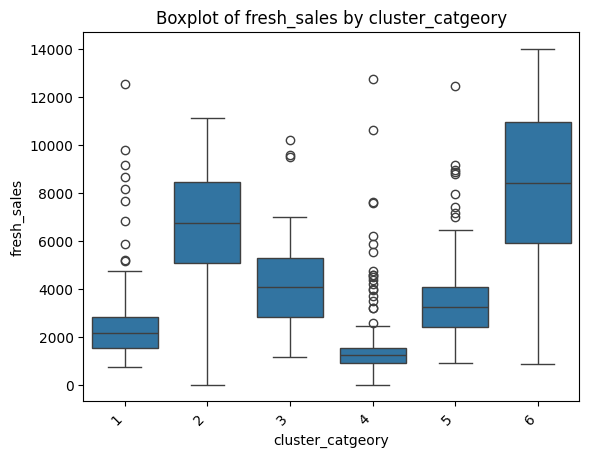

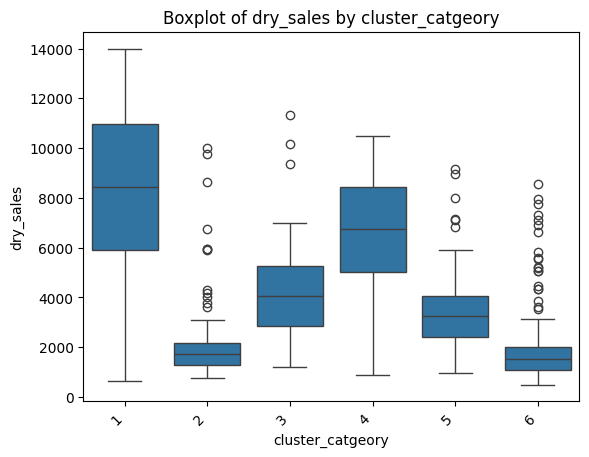

In [ ]:
# Categorical vs. Numerical Columns (Box plots)
cat_cols = ['outlet_city_original', 'cluster_catgeory']
for cat_col in cat_cols:
    if cat_col in df.columns:
        for num_col in num_cols:
            sns.boxplot(x=df[cat_col], y=df[num_col])
            plt.title(f'Boxplot of {num_col} by {cat_col}')
            plt.xticks(rotation=45, ha='right')
            plt.show()

### Multivariate Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
num_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']

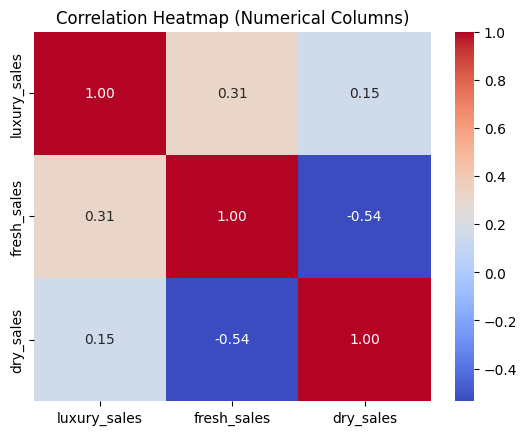

In [ ]:
# Correlation heatmap
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Columns)")
plt.show()

In [ ]:
# Grouped analysis
for group_col in ['cluster_catgeory', 'outlet_city']:
    print(f"\nAverage sales per {group_col}:")
    print(df.groupby(group_col)[num_cols].mean())


Average sales per cluster_catgeory:
                  luxury_sales  fresh_sales    dry_sales
cluster_catgeory                                        
1                  1563.111151  2188.452947  8436.588632
2                  1249.625294  6745.663655  1749.495973
3                  4070.623744  4071.405881  4069.904644
4                  1748.638677  1249.932380  6742.674686
5                  3246.528472  3248.663510  3246.189813
6                  2185.063522  8425.707259  1562.297502

Average sales per outlet_city:
             luxury_sales  fresh_sales    dry_sales
outlet_city                                        
0             2127.846549  5026.213173  5053.925922
1             2124.821181  5017.443660  5041.257147
2             1692.667131  3791.524846  4245.531046
3             2127.113483  5012.036296  5068.180502
4             2115.995313  4983.897579  5062.528631
5             1698.914390  3783.151112  4257.260191
6             2124.765398  5019.711942  5043.984327
7      

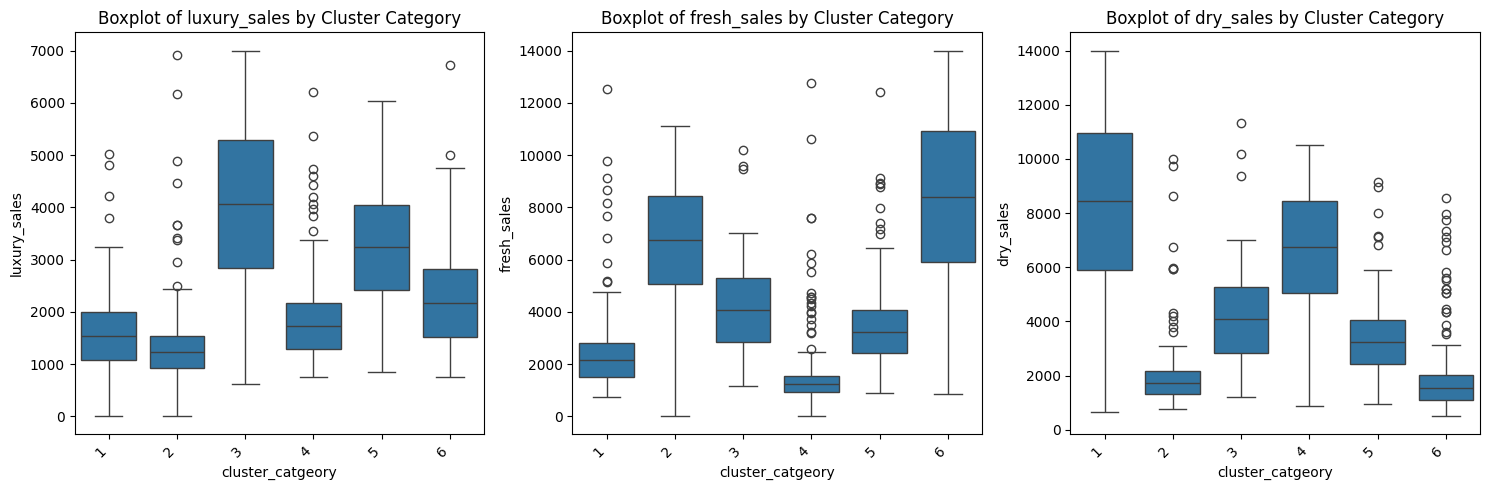

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns for sales
num_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Create a figure with 1 row and 3 columns for subplots
plt.figure(figsize=(15, 5))

# Loop through the sales categories and create each boxplot in a separate subplot
for i, num_col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, i-th subplot
    sns.boxplot(x=df['cluster_catgeory'], y=df[num_col])
    plt.title(f'Boxplot of {num_col} by Cluster Category')
    plt.xticks(rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


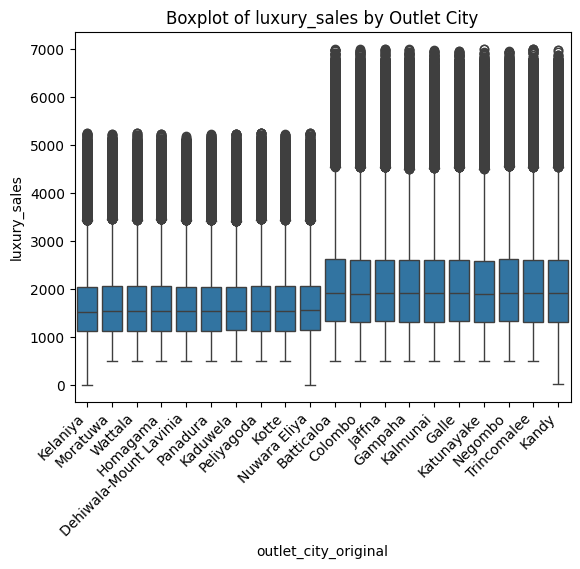

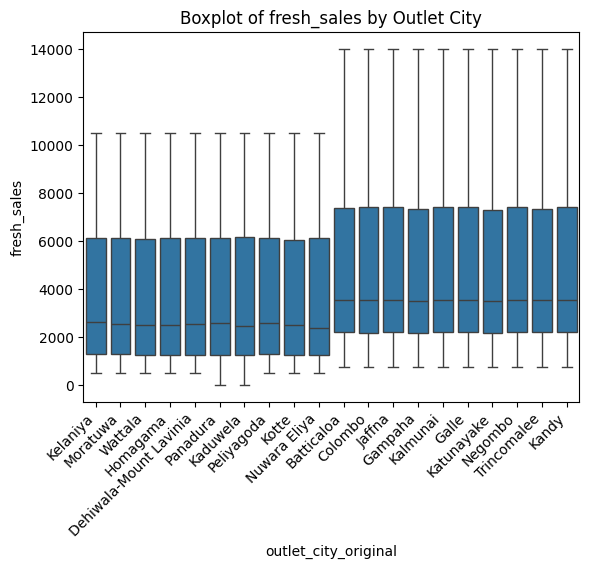

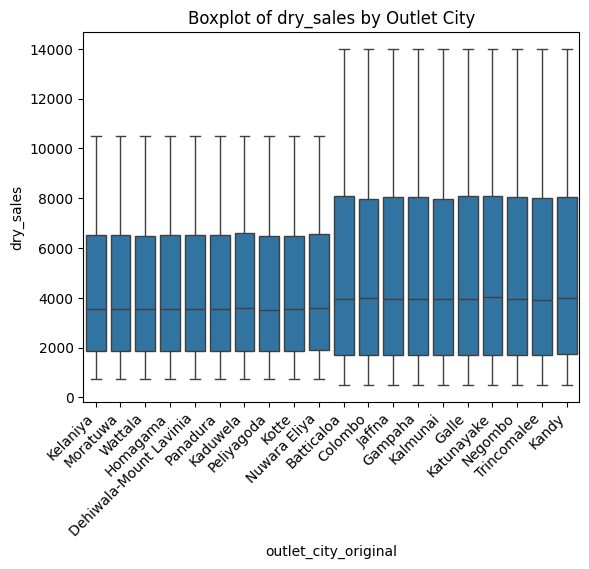

In [ ]:
# Boxplots for sales by Outlet City
for num_col in num_cols:
    sns.boxplot(x=df['outlet_city_original'], y=df[num_col])
    plt.title(f'Boxplot of {num_col} by Outlet City')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [ ]:
# Pairplot of Numerical Columns, Colored by Cluster Category (35% sample)
sns.pairplot(df.sample(frac=0.35, random_state=42), vars=num_cols, hue='cluster_catgeory', diag_kind='kde')
plt.show()


In [ ]:
# Pairplot of numerical columns with hue for outlet city
sns.pairplot(df.sample(frac=0.35, random_state=42), vars=num_cols, hue='outlet_city', diag_kind='kde')
plt.show()


## **Saving Train CSV**

In [ ]:
# Save processed dataset
df.to_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv", index=False)

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774049 entries, 0 to 774154
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Customer_ID           774049 non-null  float64
 1   outlet_city           774049 non-null  int64  
 2   luxury_sales          774049 non-null  float64
 3   fresh_sales           774049 non-null  float64
 4   dry_sales             774049 non-null  float64
 5   cluster_catgeory      774049 non-null  int64  
 6   outlet_city_original  774049 non-null  object 
 7   total_sales           774049 non-null  float64
 8   luxury_sales_pct      774049 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 59.1+ MB
